<a href="https://colab.research.google.com/github/KartikDhande007/play_store_app_review_analysis/blob/main/Capstone_Project033_Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Play Store App Review Analysis 



##### **Project Type**    - EDA
##### **Contribution**    - Team (Next Data Scientist)
##### **Team Member 1 -** Pranav Balpande (Team Leader)
##### **Team Member 2 -** Kartik Dhande
##### **Team Member 3 -** Kartik Pisudde
##### **Team Member 4 -** Sanket Bhosale

# **Project Summary -**


### **Hi everybody !**
In this notebook, I'm gonna analyze Google Play Store datas. While I was analyzing the data, I used Python. This study is my first data analyzing study.

Google Play Store apps and reviews Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.

Let's take a look at the data, which consists of two files:

* **playstore data.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.**

* **user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.**

Before jumping into the data's provided, let me first explain you about the EDA analysis.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


1. Are majority of the apps Paid or Free?
2. How importance is the rating of the application?
3. Which categories from the audience should the app be based on?
4. Which category has the most no. of installations?
5. How does the count of apps varies by Genres?
6. How does the last update has an effect on the rating?
7. How are ratings affected when the app is a paid one?


#### **Define Your Business Objective?**

Answer Here.

# ▶**Exploring Play store data:**

In [ ]:
#import library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from datetime import datetime
# plotly
import plotly 
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
#sns.set(font_scale=1.5)
warnings.filterwarnings("ignore")

# **Lets Explore play store DataFrame**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading csv File
file_path = '/content/drive/MyDrive/caspstone project/Play Store App Review Analysis/Play Store Data.csv'
ps_df=pd.read_csv(file_path)

In [ ]:
# Display the Play Store App data
play_store=pd.concat([ps_df.head(),ps_df.tail()])
play_store

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Finding the number of rows and columns in the given dataset
print(ps_df.columns)
rows=ps_df.shape[0]
columns=ps_df.shape[1]
print(f"the no of rows is {rows} and no of columns is {columns}")

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
the no of rows is 10841 and no of columns is 13


In [ ]:
ps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


**Let us first define what information the columns contain based on our inspection.**

play_store dataframe has 10841 rows and 13 columns. The 13 columns are identified as below:
1. **App** - It tells us about the name of the application with a short description (optional).
2. **Category** - It gives the category to the app.
3. **Rating** - It contains the average rating the respective app received from its users.
4. **Reviews** - It tells us about the total number of users who have given a review for the application.
5. **Size** - It tells us about the size being occupied the application on the mobile phone.
6. **Installs** - It tells us about the total number of installs/downloads for an application.
7. **Type** - IIt states whether an app is free to use or paid.
8. **Price** - It gives the price payable to install the app. For free type apps, the price is zero.
9. **Content Rating** - It states whether or not an app is suitable for all age groups or not.
10. **Genres** - It tells us about the various other categories to which an application can belong.
11. **Last Updated** - It tells us about the when the application was updated.
12. **Current Ver** - It tells us about the current version of the application.
13.**Android Ver** - It tells us about the android version which can support the application on its platform.

# **Handling the NaN values in the Play store data**

In [ ]:
def playstoreinfo():
  temp=pd.DataFrame(index=ps_df.columns)
  temp["datatype"]=ps_df.dtypes
  temp["not null values"]=ps_df.count()
  temp["null value"]=ps_df.isnull().sum()
  temp["% of the null value"]=ps_df.isnull().mean()
  temp["unique count"]=ps_df.nunique()
  return temp
playstoreinfo()

,datatype,not null values,null value,% of the null value,unique count
App,object,10841,0,0.000000,9660
Category,object,10841,0,0.000000,34
Rating,float64,9367,1474,0.135965,40
Reviews,object,10841,0,0.000000,6002
Size,object,10841,0,0.000000,462
Installs,object,10841,0,0.000000,22
Type,object,10840,1,0.000092,3
Price,object,10841,0,0.000000,93
Content Rating,object,10840,1,0.000092,6
Genres,object,10841,0,0.000000,120


### **`1). Android Ver: There are a total of 3 NaN values in this column.`**

In [ ]:
# The rows containing NaN values in the Android Ver column
ps_df[ps_df["Android Ver"].isnull()]
# dropping rows corresponding to the to the NaN values in the 'Android Ver' column.
ps_df=ps_df[ps_df['Android Ver'].notna()]
# Shape of the updated dataframe
ps_df.shape

(10838, 13)

### **`2). Current Ver: There are a total of 8 NaN values in this column.`**

In [ ]:
# The rows containing NaN values in the Current Ver column
ps_df[ps_df["Current Ver"].isnull()]
# Finding the different values the 'Current Ver' column takes
ps_df['Current Ver'].value_counts()
# dropping rows corresponding to the values which contain NaN in the column 'Current Ver'.
ps_df=ps_df[ps_df["Current Ver"].notna()]
# Shape of the updated dataframe
ps_df.shape

(10830, 13)

### **`3). Type: There is only one NaN value in this column.`** 

In [ ]:
# The row containing NaN values in the Type column
ps_df[ps_df["Type"].isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
# Finding the different values the 'Type' column takes
ps_df["Type"].value_counts()

Free    10032
Paid      797
Name: Type, dtype: int64

In [ ]:
# Replacing the NaN value in 'Type' column corresponding to row index 9148 with 'Free'
ps_df.loc[9148,'Type']='Free'

In [ ]:
ps_df[ps_df["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### **`4). Rating: This column contains 1470 NaN values.`**

In [ ]:
# The rows containing NaN values in the Rating column
ps_df[ps_df['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [ ]:
ps_df[(ps_df['Rating'] <1) | (ps_df['Rating']>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
# Finding mean and median in the Rating column excluding the NaN values.

mean_rating = round(ps_df[~ps_df['Rating'].isnull()]['Rating'].mean(),4)

median_rating = ps_df[~ps_df['Rating'].isnull()]['Rating'].median()

[mean_rating , median_rating]

[4.1918, 4.3]

**Visualization of distribution of rating using displot and detecting the outliers through boxplot.**

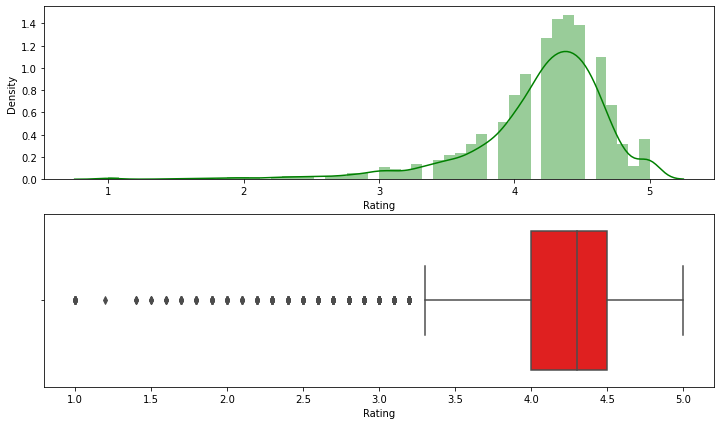

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(12,7))
sns.distplot(ps_df['Rating'],color='green',ax=ax[0])
sns.boxplot(x='Rating',data=ps_df, ax=ax[1],color='red')

In [ ]:
# Replacing the NaN values in the 'Rating' colunm with its median value
ps_df['Rating'].fillna(value=median_rating,inplace=True)

# **Handling duplicates values and Manipulating dataset:**
### **`1).Handling the duplicates in the  `App `column`**

In [ ]:
# Handling the error values in the Play store data
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
ps_df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9649, dtype: int64

In [ ]:
# Inspecting the duplicates values.
ps_df[ps_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [ ]:
ps_df[ps_df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [ ]:
# dropping duplicates from the 'App' column.
ps_df.drop_duplicates(subset = 'App', inplace = True)
ps_df.shape

(9649, 13)

In [ ]:
# Checking whether the duplicates in the 'App' column are taken care of or not
ps_df[ps_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


### **`2). Changing the datatype of the Last Updated column from string to datetime.`**

In [ ]:
# Pandas to_datetime() function applied to the values in the last updated column helps to convert string Date time into Python Date time object.
ps_df["Last Updated"] = pd.to_datetime(ps_df['Last Updated'])
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


### **`3). Changing the datatype of the `Price `column from string to float`.**

In [ ]:
ps_df['Price'].value_counts()

In [ ]:
# Creating a function drop-dollar which dropps the $ symbol if it is present and returns the output which is of float datatype.
def convert_dollar(val):
  '''
  This funtion drops the $ symbol if present and returns the value with float datatype.
  '''
  if '$' in val:
    return float(val[1:])
  else:
    return float(val)

In [ ]:
# The drop_dollar funtion applied to the price column
ps_df['Price']=ps_df['Price'].apply(lambda x: convert_dollar(x))
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
ps_df[ps_df['Price']!=0].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,"10,000+",Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.2M,"1,000+",Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up


### **`4). Converting the values in the `Installs`column from string datatype to integer datatype.`**

In [ ]:
ps_df['Installs'].value_counts()

1,000,000+        1416
100,000+          1112
10,000+           1029
10,000,000+        937
1,000+             886
100+               709
5,000,000+         607
500,000+           504
50,000+            468
5,000+             467
10+                384
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

In [ ]:
# Creating a function convert_plus which drops the '+' symbol if it is present and returns the output which is of integer datatype.

def convert_plus(val):
  '''
  This function drops the + symbol if present and returns the value with int datatype.
  '''
  if '+' and ',' in val:
    new = int(val[:-1].replace(',',''))
    return new
  elif '+' in val:
    new1 = int(val[:-1])
    return new1
  else:
    return int(val)

In [ ]:
# The drop_plus funtion applied to the main dataframe

ps_df['Installs'] = ps_df['Installs'].apply(lambda x: convert_plus(x))
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


### **`5). Converting the values in the `Size` column to a same unit of measure(MB).`**

In [ ]:
ps_df['Size'].value_counts()

Varies with device    1227
12M                    181
11M                    181
13M                    177
14M                    176
                      ... 
721k                     1
430k                     1
429k                     1
200k                     1
619k                     1
Name: Size, Length: 457, dtype: int64

In [ ]:
# Defining a function to convert all the entries in KB to MB and then converting them to float datatype.

def convert_kb_to_mb(val):
  '''
  This function converts all the valid entries in KB to MB and returns the result in float datatype.
  '''
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 4)
    else:
      return val
  except:
    return val

In [ ]:
# The kb_to_mb funtion applied to the size column

ps_df['Size'] = ps_df['Size'].apply(lambda x: convert_kb_to_mb(x))
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
ps_df['Size'] = ps_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
ps_df['Size'] = ps_df['Size'].apply(lambda x: float(x))

In [ ]:
# Finding max, min, mean, and median in the Size column excluding the 'Varies with device' values.

max_size = ps_df[ps_df['Size'] != 'Varies with device']['Size'].max()

min_size = ps_df[ps_df['Size'] != 'Varies with device']['Size'].min()

mean_size = round(ps_df[ps_df['Size'] != 'Varies with device']['Size'].mean(),4)

median_size = ps_df[ps_df['Size'] != 'Varies with device']['Size'].median()

[max_size, min_size, mean_size, median_size]

[100.0, 0.0083, 20.4136, 12.0]

**Visualization of distribution of `**Size**` using displot and detecting the outliers through boxplot.**

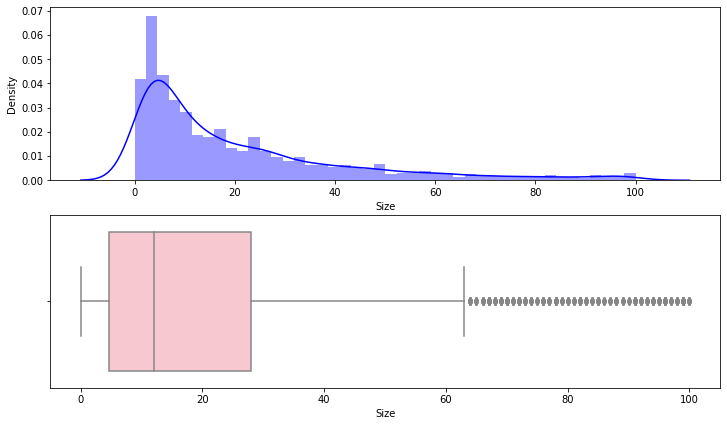

In [ ]:
# Distplot
fig, ax = plt.subplots(2,1, figsize=(12,7))
sns.distplot(ps_df[ps_df['Size'] != 'Varies with device']['Size'], color='blue', ax=ax[0])
sns.boxplot(x='Size',data=ps_df, ax=ax[1], color='pink')

### **`6). Converting the datatype of values in the `Reviews` column from string to int.`**

In [ ]:
# Converting the datatype of the values in the reviews column from string to int
ps_df['Reviews'] = ps_df['Reviews'].astype(int)
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
ps_df.describe()

,Rating,Reviews,Size,Installs,Price
count,9649.000000,9.649000e+03,8422.000000,9.649000e+03,9649.000000
mean,4.192476,2.168145e+05,20.413556,7.785404e+06,1.100079
std,0.496528,1.832255e+06,21.833485,5.378557e+07,16.860857
min,1.000000,0.000000e+00,0.008300,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,4.600000,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,12.000000,1.000000e+05,0.000000
75%,4.500000,2.944500e+04,28.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


# **`1). What is the ratio of number of Paid apps and Free apps?`**

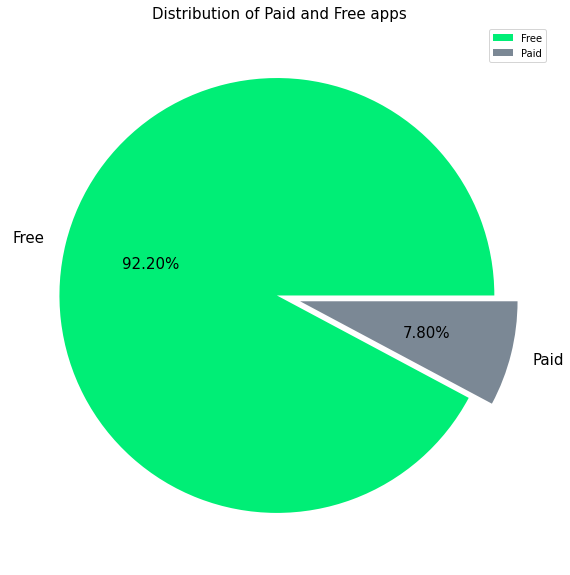

In [ ]:
data = ps_df['Type'].value_counts() 
labels = ['Free', 'Paid']

# create pie chart
plt.figure(figsize=(10,10))
colors = ["#00EE76","#7B8895"]
explode=(0.01,0.1)
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Distribution of Paid and Free apps',size=15,loc='center')
plt.legend()

## **`2).Which category of Apps from the Content Rating column are found more on playstore ?`**

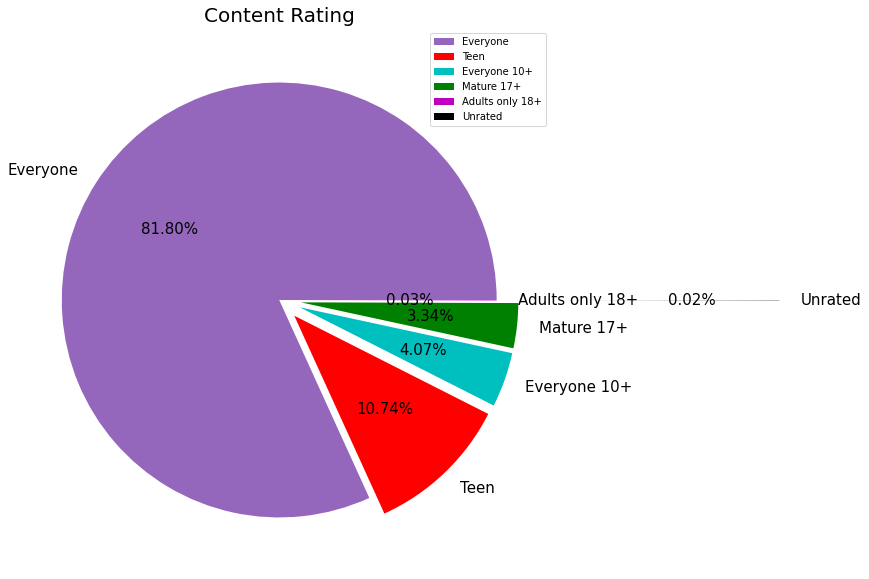

In [ ]:
# Content rating of the apps
data = ps_df['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+', 'Unrated']

#create pie chart
plt.figure(figsize=(10,10))
explode=(0,0.1,0.1,0.1,0.0,1.3)
colors = ['C4', 'r', 'c', 'g', 'm', 'k']
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Content Rating',size=20,loc='center')
plt.legend()

## **`3).Top categories on Google Playstore?`**

In [ ]:
ps_df.groupby("Category")["App"].count().sort_values(ascending= False)

Category
FAMILY                 1829
GAME                    959
TOOLS                   825
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         374
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           63
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: App, dtype: int64

In [ ]:
x = ps_df['Category'].value_counts()
y = ps_df['Category'].value_counts().index
x_list = []
y_list = []
for i in range(len(x)):
    x_list.append(x[i])
    y_list.append(y[i])

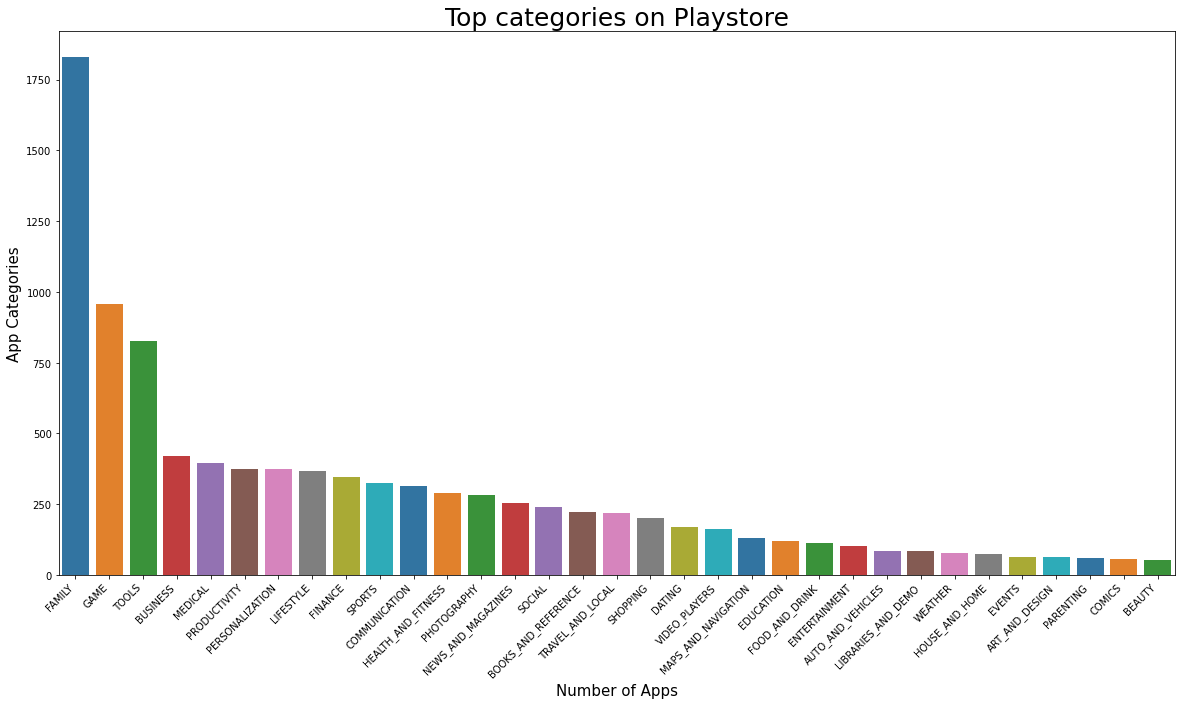

In [ ]:
#Number of apps belonging to each category in the playstore
plt.figure(figsize=(20,10))
plt.xlabel('Number of Apps', size=15)
plt.ylabel('App Categories', size=15)
graph = sns.barplot(y = x_list, x = y_list, palette= "tab10")
graph.set_title("Top categories on Playstore", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',);

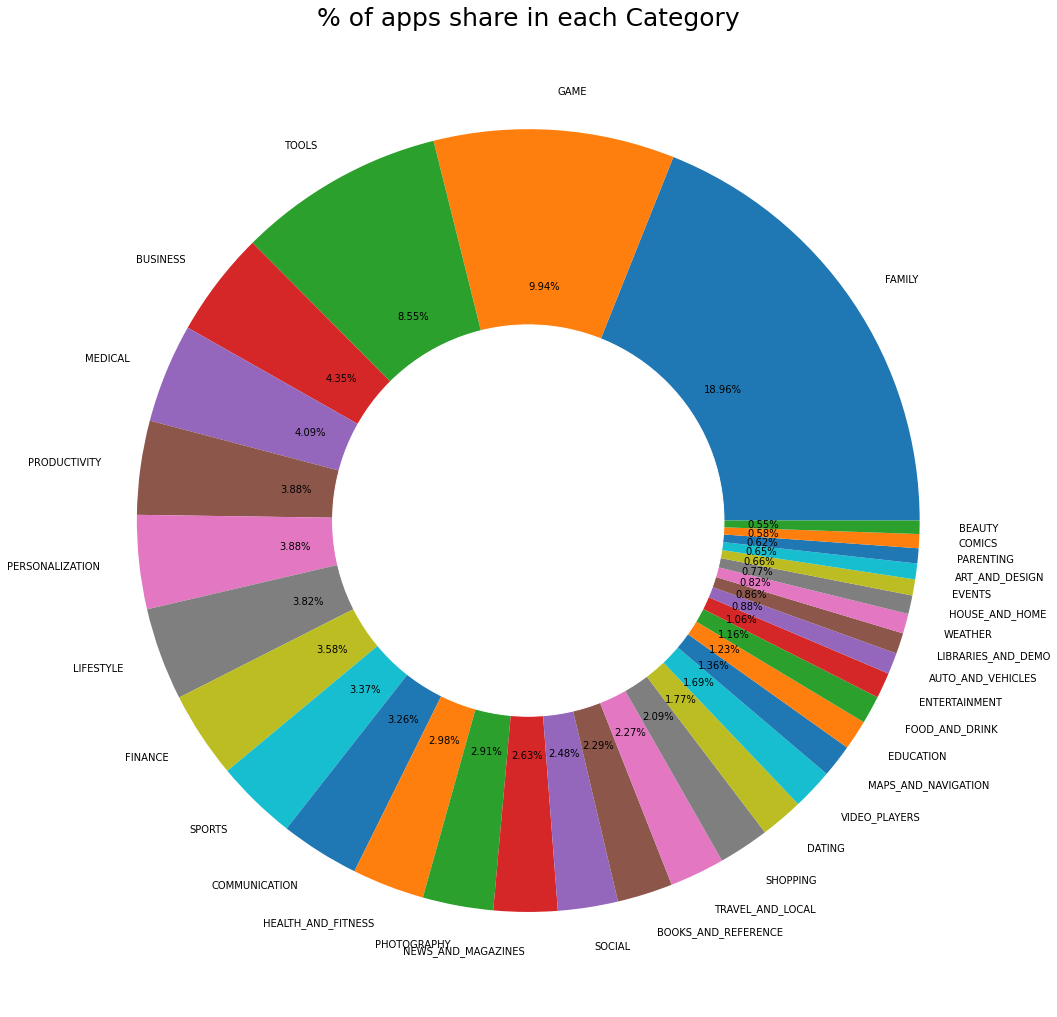

In [ ]:
# Percentage of apps belonging to each category in the playstore
plt.figure(figsize=(18,18))
plt.pie(ps_df.Category.value_counts(), labels=ps_df.Category.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% of apps share in each Category', fontsize = 25)
plt.show()

### **`4). Which category App's have most number of installs?`**

Text(0.5, 1.0, 'Total app installs in each category')

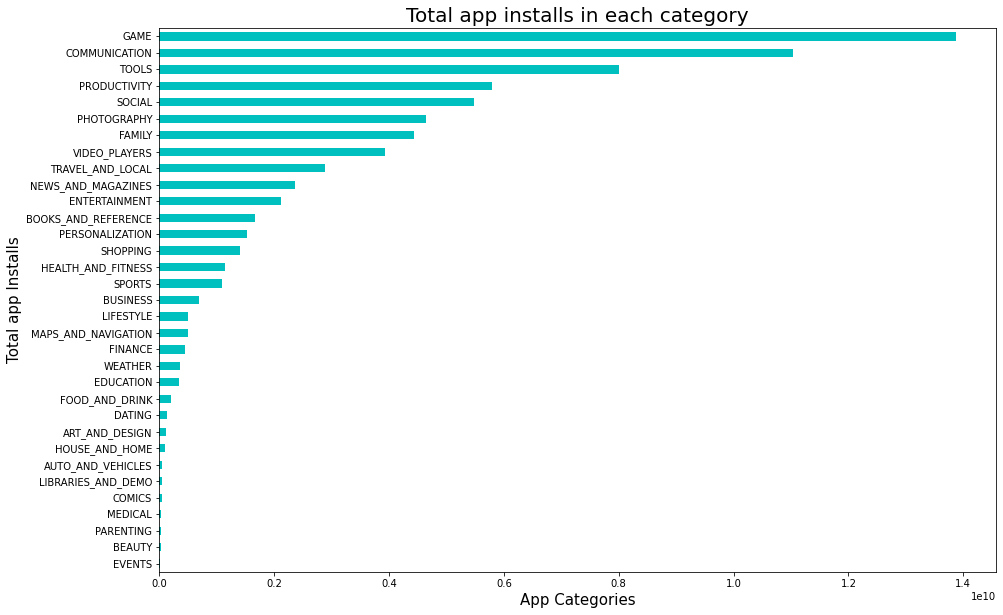

In [ ]:
# total app installs in each category of the play store

a = ps_df.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(15,10), color = 'c', )
plt.ylabel('Total app Installs', fontsize = 15)
plt.xlabel('App Categories', fontsize = 15)
plt.xticks()
plt.title('Total app installs in each category', fontsize = 20)

### **`5). Average rating of the apps`**

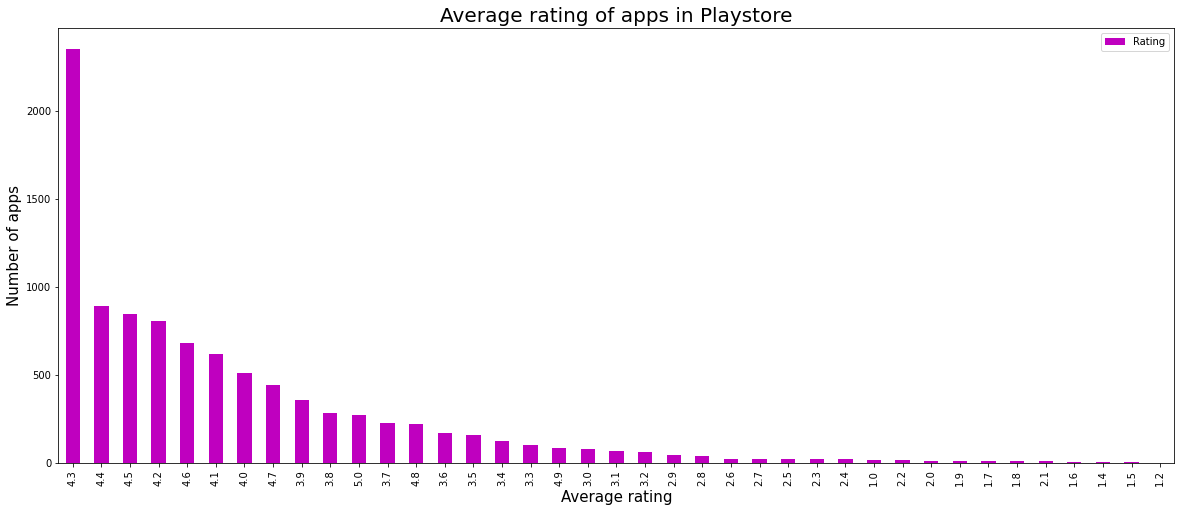

In [ ]:
# Average app ratings

ps_df['Rating'].value_counts().plot.bar(figsize=(20,8), color = 'm' )
plt.xlabel('Average rating',fontsize = 15 )
plt.ylabel('Number of apps', fontsize = 15)
plt.title('Average rating of apps in Playstore', fontsize = 20)
plt.legend()

### **`6). What are the Top 10 installed apps in any category?`**

In [ ]:
def findtop10incategory(str):
    str = str.upper()
    top10 = ps_df[ps_df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    plt.figure(figsize=(15,6), dpi=100)
    plt.title('Top 10 Installed Apps',size = 20)  
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs, palette= "icefire")
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')

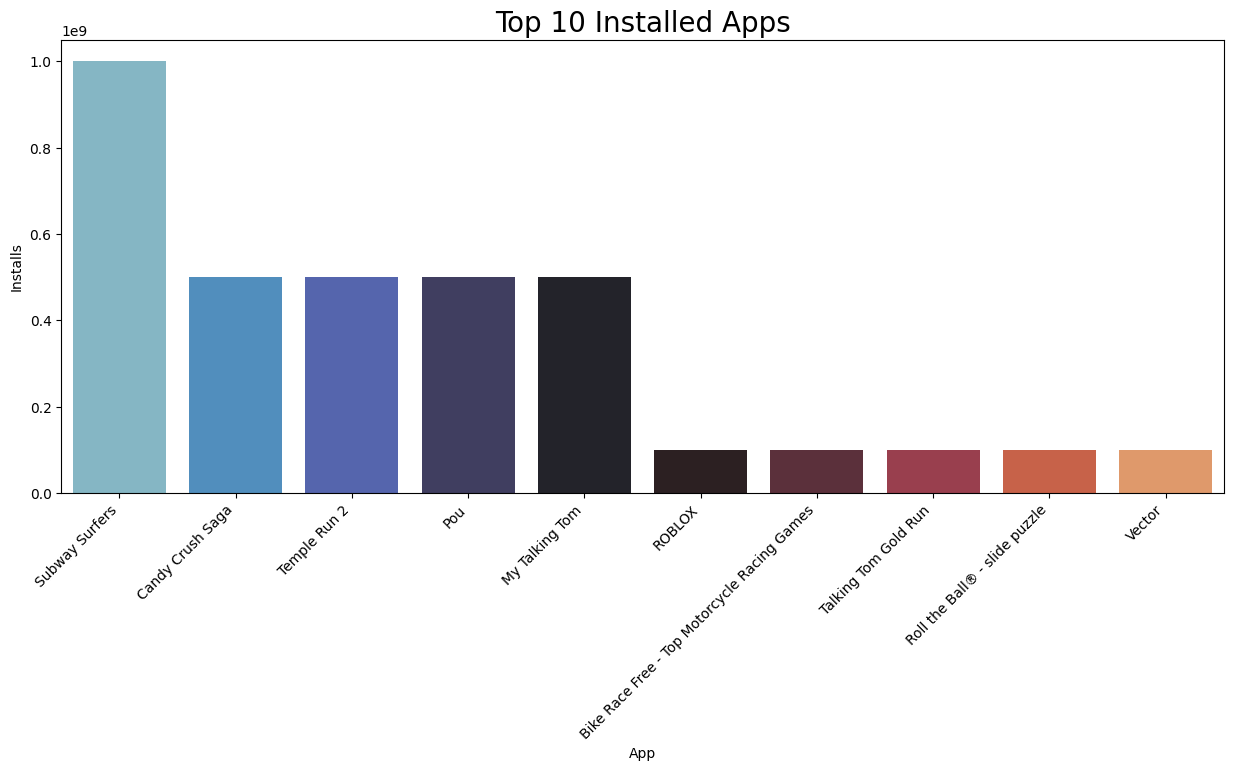

In [ ]:
findtop10incategory('GAME')

### **`7). Top apps that are of free type.`**

In [ ]:
 # Creating a df for only free apps
 
 free_df = ps_df[ps_df['Type'] == 'Free']

In [ ]:
# Creating a df for top free apps

top_free_df = free_df[free_df['Installs'] == free_df['Installs'].max()]
top10free_apps=top_free_df.nlargest(10, 'Installs', keep='first')
top10free_apps.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,NaN,1000000000,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device
341,Hangouts,COMMUNICATION,4.0,3419249,NaN,1000000000,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
865,Google Play Games,ENTERTAINMENT,4.3,7165362,NaN,1000000000,Free,0.0,Teen,Entertainment,2018-07-16,Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device


In [ ]:
# Top free apps

top_free_df['App']

152                            Google Play Books
335     Messenger – Text and Video Chat for Free
336                           WhatsApp Messenger
338                 Google Chrome: Fast & Secure
340                                        Gmail
341                                     Hangouts
391                Skype - free IM & video calls
865                            Google Play Games
1654                              Subway Surfers
2544                                    Facebook
2545                                   Instagram
2554                                     Google+
2808                               Google Photos
3117                   Maps - Navigate & Explore
3127                          Google Street View
3234                                      Google
3454                                Google Drive
3665                                     YouTube
3687                     Google Play Movies & TV
3736                                 Google News
Name: App, dtype: ob

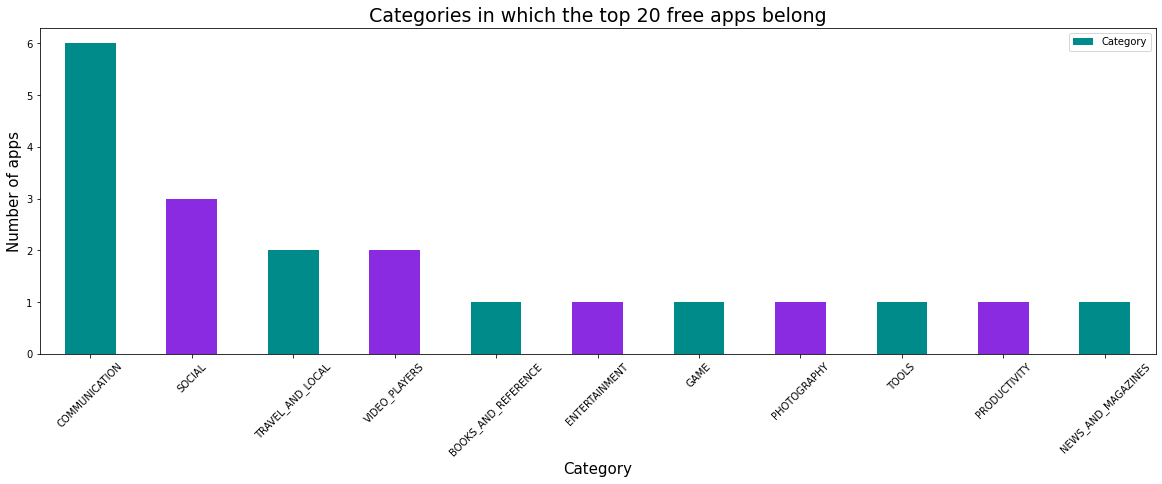

In [ ]:
# Categories in which the top 20 free apps belong to
top_free_df['Category'].value_counts().plot.bar(figsize=(20,6), color= ('darkcyan','blueviolet'))
plt.xlabel('Category', size=15)
plt.ylabel('Number of apps', size=15)
plt.title('Categories in which the top 20 free apps belong', size=19)
plt.xticks(rotation=45)
plt.legend()

# **Conclusion**

In this project of analyzing play store applications, we have worked on several parameters which would help AlmaBetter to do well in launching their apps on the play store.

In the initial phase, we focused more on the problem statements and data cleaning, in order to ensure that we give them the best results out of our analysis.

AlmaBetter needs to focus more on:
1. Developing apps related to the least categories as they are not explored much. Like events and beauty.
2. Most of the apps are Free, so focusing on free app is more important.
3. Focusing more on content available for Everyone will increase the chances of getting the highest installs.
4. They need to focus on updating their apps regularly, so that it will attract more users.
5. They need to keep in mind that the sentiments of the user keep varying as they keep using the app, so they should focus more on users needs and features.

* Percentage of free apps = ~92%
* Percentage of apps with no age restrictions = ~82%
* Most competitive category: Family
* Category with the highest average app installs: Game
* Percentage of apps that are top rated = ~80%
* Family, Game and Tools are top three categories having 1906, 926 and 829 app count. 
* Tools, Entertainment, Education, Buisness and Medical are top Genres. 
* 8783 Apps are having size less than 50 MB. 7749 Apps are having rating more than 4.0 including both type of apps.
* There are 20 free apps that have been installed over a billion times.
* Minecraft is the only app in the paid category with over 10M installs. This app has also produced the most revenue only from the installation fee.
* Category in which the paid apps have the highest average installation fee: Finance
* The median size of all apps in the play store is 12 MB.
* The apps whose size varies with device has the highest number average app installs.
* The apps whose size is greater than 90 MB has the highest number of average user reviews, ie, they are more popular than the rest.
* Helix Jump has the highest number of positive reviews and Angry Birds Classic has the highest number of negative reviews.
* Overall sentiment count of merged dataset in which Positive sentiment count is 64%, Negative 22% and Neutral 13%.

**1.Rating**

Most of the apps have rating in between 4 and 5.

Most numbers of apps are rated at 4.3

Categories of apps have more than 4 average rating.item

 **2.Size**

Maximum number of applications present in the dataset are of small size.

**3.Installs**

Majority of the apps come into these three categories, Family, Game, and Tools.

Maximum number of apps present in google play store come under Family, Game and tools but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Game, Communication, Productivity and Social.

Subway Surfers, Facebook, Messenger and Google Drive are the most installed apps.

**4.Type(Free/Paid)**

About 92% apps are free and 8% apps are of paid type.

The category ‘Family’ has the highest number of paid apps.

Free apps are installed more than paid apps.

The app “I’m Rich — Trump Edition” from the category ‘Lifestyle’ is the most costly app priced at $400

**5.Content Rating**

Content having Everyone only has most installs, while unrated and Adults only 18+ have less installs.

**6.Reviews**

Number of installs is positively correlated with reviews with correlation 0.64.
Sentiment Analysis

**7.Sentiment** 

Most of the reviews are of Positive Sentiment, while Negative and Neutral have low number of reviews.

**8.Sentiment Polarity / Sentiment Subjectivity**

Collection of reviews shows a wide range of subjectivity and most of the reviews fall in [-0.50,0.75] polarity scale implying that the extremely negative or positive sentiments are significantly low.
Most of the reviews show a mid-range of negative and positive sentiments.

Sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low.

Sentiment Polarity is not highly correlated with Sentiment Subjectivity.